#**Udacity: Introduction to TensorFlow for Deep Learning**

## Lesson 3
In this colab notebook, you would learn to **build and train a neural network to classify a clothing item**.   
The neural network would be trained using the fashion mnist dataset.   

**Concept introduced**
1. Training a model to perform classification (using activation function)
2. Model training and testing 
3. Dataset preprocessing and batching

## Import dependencies

In [1]:
# install tensorflow_datasets to download fashion MNIST dataset
!pip install -U tensorflow_datasets

     |████████████████████████████████| 3.9 MB 39.0 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [2]:
# import tensorflow and tensorflow datasets
import tensorflow as tf
import tensorflow_datasets as tfds

# import helper function
import math
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import tqdm.auto

tqdm.tqdm = tqdm.auto.tqdm

where is tqdm being used in the code?

## Import Fashion MNIST Dataset

Fashion MNIST data contains 70,000 greyscale images of different articles of clothing.   

**Different classes of cloths.**   
`['Tshirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']`

**Dataset**
- Training dataset (60,000) samples
- Test dataset (10,000) samples
- Images are (28x28) greyscale images. So each image have 784 features.

In [3]:
# load the fashion mnist dataset and metadata
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


## Explore the Fashion MNIST Dataset

In [4]:
# peak into the returned dataset and metadata
print('metadata is a {} type of object'.format(type(metadata)))
print('dataset is a {} type of object'.format(type(dataset)))


metadata is a <class 'tensorflow_datasets.core.dataset_info.DatasetInfo'> type of object
dataset is a <class 'dict'> type of object


In [5]:
# print metadata class tensorflow_datasets.core
print(metadata)

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
    

In [6]:
# print dataset
print(dataset)

{Split('train'): <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>, Split('test'): <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}


In [7]:
# get the training and test dataset
train_dataset, test_dataset = dataset['train'], dataset['test']

# print training dataset
print(train_dataset)


<PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>


In [8]:
# print size of training dataset
print(type(train_dataset))
print(len(train_dataset))


<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
60000


Display some info from the metadata

In [9]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Number of training examples: {}'.format(num_train_examples))
print('Number of test examples: {}'.format(num_test_examples))

Number of training examples: 60000
Number of test examples: 10000


Define the class label

In [10]:
print('Number of labels in the Fashion MNIST dataset {}'.format(metadata.features['label'].num_classes))

# how do you get names? it's not displayed in metadata
print('Class_names: {}'.format(metadata.features['label'].names))

class_names = metadata.features['label'].names

Number of labels in the Fashion MNIST dataset 10
Class_names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [11]:
# it does not show up here as well :(
print(metadata.features['label'])

ClassLabel(shape=(), dtype=tf.int64, num_classes=10)


Okay so the dataset is contained within the dataset dictionary. I have no way of viewing an instance from the training and test dataset. I assume that it is in the `train_dataset` but i have no way of viewing an instance or it's label.   

Another attempt at getting instance from the train_dataset

In [12]:
# show all the attributes of the train_dataset
dir(train_dataset)

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_variable_with_custom_getter',
 '_apply_options',
 '_as_serialized_graph',
 '_buffer_size',
 '_checkpoint_dependencies',
 '_consumers',
 '_deferred_dependencies',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_graph',
 '_graph_attr',
 '_handle_deferred_dependencies',
 '_has_captured_ref',
 '_input_dataset',
 '_inputs',
 '_list_extra_dependencies_for_serialization',
 '_list_functions_for_serialization',
 '_lookup_dependency',
 '_map_r

##*Word of advise*

Don't get too caught up on the little detail.
For the most part in the last section all that happened was that, the data was loaded into the workspace.

A lot of the technicalities w.r.t how the data was loaded is based on the designed use of tensorflow.

## Preprocess the data

The image is a 28x28 greyscale image. The pixel values are in a range of `[0,255]`, deep neural network (DNN) model's require the input data to be normalized as such it needs to be in a range of `[0, 1]`

In [13]:
def normalize(image, label):
  '''Normalize the input image and divide it by 255'''
  image = tf.cast(image, tf.float32)
  image /= 255
  return image, label

# Apply the normalize function to the images in the training and test dataset
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [14]:
# Cache the dataset to make training faster
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

## Explore the processed data

Display a single and batch samples from the training dataset

Sample label 2 and name Pullover
Initial shape of the image: (28, 28, 1)
New shape of the image: (28, 28)


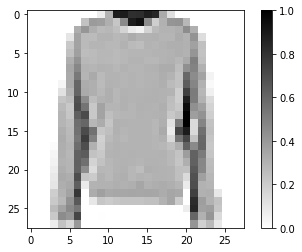

In [15]:
# use the take function to get a single example from the train_dataset
# output from take function is a tuple containing image and label
for image, label in train_dataset.take(1):
  break

# print the label of the image
print('Sample label {} and name {}'.format(label, class_names[label]))

# print the initial shape of the image
print('Initial shape of the image: {}'.format(image.shape))

# reshape the image into a 28x28 array
image = image.numpy().reshape((28,28))
print('New shape of the image: {}'.format(image.shape))

# Plot the image using a binary colormap
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

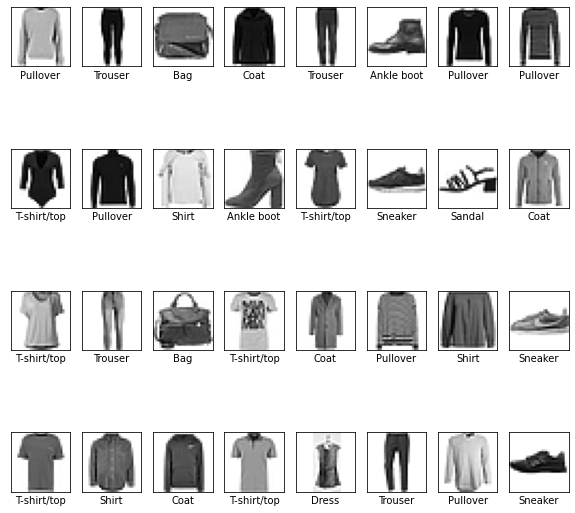

In [16]:
# Display 32 instance from the dataset

plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(32)):
  image = image.numpy().reshape((28,28))
  plt.subplot(4,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
plt.show()


## Build the model

1. Use the flatten layer to convert the 2D image into a 1D vector
2. Define a hidden layer for the deep neural network with the ReLU activation function.
3. Define a output layer for the neural network with the softmax activation function.
4. Compile the neural network

In [35]:
# Define the layers for the neural network

# define the input layer for the neural network. Converts the 2D image into 1D vector
l0 = tf.keras.layers.Flatten(input_shape=(28, 28, 1))

# hidden layer contains 128 neurons with relu activation function
l1 = tf.keras.layers.Dense(units=128, activation=tf.nn.relu)

# output layer contains 10 neurons with softmax activation function for probability output
l2 = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)


In [36]:
# build the model from the different layers
model = tf.keras.Sequential([l0, l1, l2])


- The Adam optimizer is used with the default parameter
- SparseCategoricalCrossentropy is used as the loss function for the model during training
- Metrics, define the metrics that are calculated at every epoch during training


In [37]:
# Compile the model by defining the loss and optimizer function. Include additional metrics to be calculated during training and evaluation
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


## Train the model

Training dataset
- Repeat the training dataset indefinitely (loops on itself)
- shuffle the repeating dataset, so that its on a randomised order
- batch the dataset, to use batches of 32 images and labels when updating the model variables

test dataset
- create a batch from the dataset

In [20]:
BATCH_SIZE = 32
train_dataset_batched = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset_batched = test_dataset.cache().batch(BATCH_SIZE)

In [21]:
for batched_images, batched_labels in train_dataset_batched.take(1):
  break

for unbatched_images, unbatched_labels in train_dataset.take(1):
  break

print('Shape of a single instance in the batched training dataset: {}'.format(batched_images.shape))
print('Shape of a single instance in the unbatched training dataset: {}'.format(unbatched_images.shape))
print('Shape of a single label in the batched training dataset: {}'.format(batched_labels.shape))
print('Shape of a single label in the unbatched training dataset: {}'.format(unbatched_labels.shape))

Shape of a single instance in the batched training dataset: (32, 28, 28, 1)
Shape of a single instance in the unbatched training dataset: (28, 28, 1)
Shape of a single label in the batched training dataset: (32,)
Shape of a single label in the unbatched training dataset: ()


In [22]:
history = model.fit(train_dataset_batched, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4958 - accuracy: 0.8269
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3681 - accuracy: 0.8657
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3353 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3152 - accuracy: 0.8855
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2931 - accuracy: 0.8919


In [23]:
print('Trained model final performance on the training dataset')
print('Model Accuaracy at final epoch: {:.2f}'.format(history.history['accuracy'][-1]))
print('Model Loss at final epoch: {:.2f}'.format(history.history['loss'][-1]))

Trained model final performance on the training dataset
Model Accuaracy at final epoch: 0.89
Model Loss at final epoch: 0.29


## Evaluate the model

evaluate the model on the test dataset, to display it's performance

In [24]:
test_loss, test_accuracy = model.evaluate(test_dataset_batched, steps=math.ceil(num_test_examples/BATCH_SIZE))
print('Model loss on test_dataset: {:.2f}'.format(test_loss))
print('Model accuracy on test_dataset: {:.2f}'.format(test_accuracy))

313/313 [==============================] - 2s 5ms/step - loss: 0.3468 - accuracy: 0.8746
Model loss on test_dataset: 0.35
Model accuracy on test_dataset: 0.87


## Make predictions with the trained model

Using samples from the test dataset make some predictions

In [25]:
# Make predictions using samples from the test dataset
for test_images, test_labels in test_dataset_batched.take(1):
  print('shape of test_images: {}'.format(test_images.shape))
  print('shape of test_labels: {}'.format(test_labels.shape))
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

print('Prediction shape: {}'.format(predictions.shape))

shape of test_images: (32, 28, 28, 1)
shape of test_labels: (32,)
Prediction shape: (32, 10)


why convert the batch of examples into a numpy before making predictions?
Try passing the batched dataset without reshaping it

In [26]:
print(type(predictions))

<class 'numpy.ndarray'>


In [27]:
# Make another set of prediction using examples from the test dataset

# Create an empty numpy array to store the model prediction
predictions_2 = np.empty(shape=[0, 10])

for test_images_2, test_labels_2 in test_dataset_batched.take(2):
  predictions_2 = np.append(predictions_2, model.predict(test_images_2), axis=0)

print(predictions_2.shape)

(64, 10)


So it stills works even without calling numpy method on the object returned by the take function.

*Okay...*

btw. The reason why it was failing (i.e shape of predictions with 2 batch = 32, 10) was because it was overwritting the output from the previous batch so it only held the output from the last batch.


In [28]:
# Lets see if how model is correct
print('Label for the first image in our batch: {}'.format(class_names[test_labels[0]]))
print('Predicted label for the first image in our batch: {}'.format(class_names[np.argmax(predictions[0])]))

Label for the first image in our batch: Coat
Predicted label for the first image in our batch: Coat


*Nice*

Can we see the image?


Shape of the test_image: (28, 28)


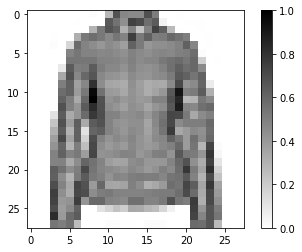

In [29]:
image = test_images[0]
image = image.reshape((28,28))
print('Shape of the test_image: {}'.format(image.shape))

# create a figure to plot on
plt.figure()

# plot the image and color map
plt.imshow(image, cmap=plt.cm.binary)

# plot the colorbar
plt.colorbar()

# don't show a grid
plt.grid(False)

# show the image
plt.show()

## Plot Images and Model Predictions

In [30]:
#def Make_prediction_and_plot_output(batched_images, batched_labels, trained_model):
#  '''
#  Function takes a batch of images and label and creates a plot of the images and the model predictions
#  Args:
#    - batched_images: Batched images from the fashion mnist dataset
#    - batched_labels: Batched labels from the fashion mnist dataset
#    - trained model: Trained DNN model
#  '''
#  model_predictions = trained_model.predict(batched_images)
#
#  plt.figure()
#  for index, image in batched_images:
#    image = image.reshape((28, 28))
#    plt.subplot(4, 8, index+1)
#    plt.imshow(image, cmap=plt.cm.binary)
#    plt.xlabel('Model Prediction: {}, Actual label: {}'.format(class_names[np.argmax(model_predictions[index])], class_names[batched_labels[index]])) 
#  plt.show()


## Something was wrong with the function and calling it does not show the error. Function code brought outside to debug
#Make_prediction_and_plot_output(test_images, test_labels)

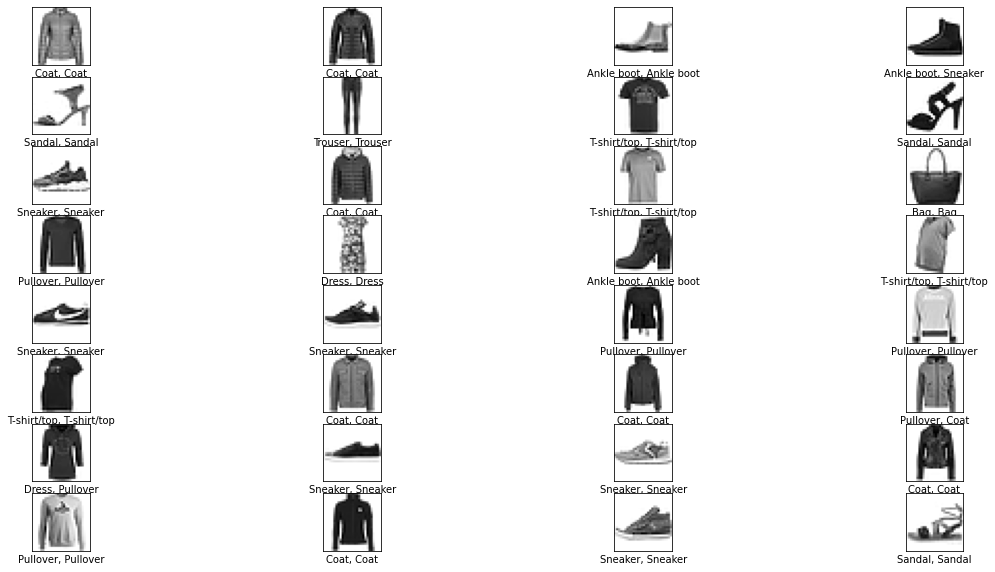

In [31]:
model_predictions = model.predict(test_images)

plt.figure(figsize=(20,10))
for index, image in enumerate(test_images):
  image = image.reshape((28, 28))
  plt.subplot(8, 4, index+1)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel('{}, {}'.format(class_names[np.argmax(model_predictions[index])], class_names[test_labels[index]])) 
  plt.xticks([])
  plt.yticks([])
plt.show()

Udacity Lesson code

In [32]:
def plot_image(i, predictions_arrays, true_labels, images):
  predictions_array = predictions_arrays[i]
  true_label = true_labels[i]
  image = images[i]

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                     100*np.max(predictions_array),
                                     class_names[true_label]),
                                     color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array = predictions_array[i]
  true_label = true_label[i]

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

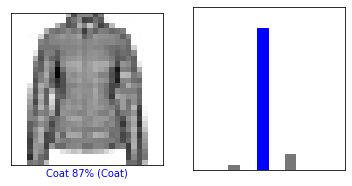

In [33]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

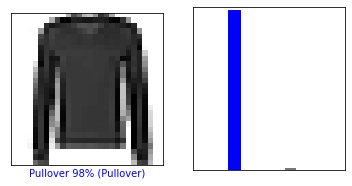

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

## Exercise


### 1. Train a model with a single epoch? What is it's performance.

For this exercise, i set the batch number to be 64. So for a dataset with 60,000 training samples and 10,000 test samples. it would take 937.5 training steps to complete a single epoch.

Also i'm guess that the model's performance would not be as good as the model that has gone through 5 different epochs.

In [38]:
# Get the data
exercise_train_dataset, exercise_test_dataset = dataset['train'], dataset['test']

# Normalise the data
def normalise_data(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

exercise_train_dataset = exercise_train_dataset.map(normalize)
exercise_test_dataset = exercise_test_dataset.map(normalize)

# Batch the data to speed up training
BATCH_SIZE_2 = 64
exercise_train_dataset_batched = exercise_train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE_2)
exercise_test_dataset_batched = exercise_test_dataset.cache().repeat().shuffle(num_test_examples).batch(BATCH_SIZE_2)

In [39]:
# Code with error

# define a model
# - Define layers: Flatten layer, Dense layer with Relu activation, Output layer
model2 = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
                              tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu),
                              tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax)
])

# Compile the model
# - Define the loss, optimizer and metrics
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer='adam',
               metrics = ['accuracy'])


# side note
# called loss function as tf.keras.losses.SparseCategoricalCrossentropy, this caused the TypeError: Expected float32, got 'auto' of type 'str' instead.


# train the model
history = model2.fit(exercise_train_dataset_batched, epochs=1, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE_2))

print('Model Accuracy: {:.2f} on single epoch'.format(history.history['accuracy'][-1]))
print('Model Loss: {:.2f} on single epoch'.format(history.history['loss'][-1]))

938/938 [==============================] - 5s 3ms/step - loss: 0.5183 - accuracy: 0.8194
Model Accuracy: 0.82 on single epoch
Model Loss: 0.52 on single epoch


### 2. Change the number of neuron in the Dense layer. Go really low and view how the model accuracy changes

In [40]:
# different range of neurons to try out
unit_list = [10, 100, 250, 400, 512]

def build_and_train_model_with_X_units(hidden_units):
  '''
  function builds and trains a neural network model with X unit in the first hidden layer

  Args:
    hidden_units (int): number of units in the hidden layer for the neural network
  
  Returns:
    - trained_model (tf.keras.model): Model trained on the fashion mnist dataset
    - history (tf.keras.history): History object containing information about model metrics during training
  '''
  
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
                                      tf.keras.layers.Dense(units=hidden_units, activation=tf.keras.activations.relu),
                                      tf.keras.layers.Dense(units=10, activation=tf.keras.activations.sigmoid)
  ])

  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                metrics=['accuracy'])
  
  history = model.fit(exercise_train_dataset_batched, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE_2))

  return history, model

Units_model_performance = {}


for unit in unit_list:
  history, model = build_and_train_model_with_X_units(unit)
  Units_model_performance[unit] = (history, model)


print('Finished training neural networks with different number of neurons in the hidden layer')


Epoch 1/5
938/938 [==============================] - 3s 2ms/step - loss: 2.3264 - accuracy: 0.0993
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 2.3120 - accuracy: 0.0984
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 2.3118 - accuracy: 0.0985
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 2.3111 - accuracy: 0.1003
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 2.3113 - accuracy: 0.1013
Epoch 1/5
938/938 [==============================] - 3s 2ms/step - loss: 1.4414 - accuracy: 0.5969
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 1.1842 - accuracy: 0.5280
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 1.4635 - accuracy: 0.4058
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 1.5796 - accuracy: 0.3474
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 1.4812 - accuracy: 0.4045
Epoch 1/5


In [41]:
# Display results

for unit in unit_list:
  history, _ = Units_model_performance[unit]
  final_accuracy = history.history['accuracy'][-1]
  final_loss = history.history['loss'][-1]

  print('Number of unit in hidden layer: {}, Model final accuracy: {:.2f} and Model final loss: {:.2f}'.format(unit, final_accuracy, final_loss))

Number of unit in hidden layer: 10, Model final accuracy: 0.10 and Model final loss: 2.31
Number of unit in hidden layer: 100, Model final accuracy: 0.40 and Model final loss: 1.48
Number of unit in hidden layer: 250, Model final accuracy: 0.43 and Model final loss: 1.40
Number of unit in hidden layer: 400, Model final accuracy: 0.51 and Model final loss: 1.19
Number of unit in hidden layer: 512, Model final accuracy: 0.41 and Model final loss: 1.46


I'll admit that i did not expect these results. So increasing the number of neurons in the hidden layer helps (sometimes) in increasing the models performance but from 250 there's a dip and it begins to increase again.
   

Trying to repeat the results again with a similar range of values

In [42]:
unit_list_2 = [10, 100, 128, 250, 350, 400, 450, 500, 600]

Units_model_performance_2 = {}
i = 0

for unit in unit_list_2:
  i += 1
  history, model = build_and_train_model_with_X_units(unit)
  print('Finished training model {}'.format(i))
  print(' ')
  Units_model_performance_2[unit] = (history, model)

for unit in unit_list_2:
  history, _ = Units_model_performance_2[unit]
  final_accuracy = history.history['accuracy'][-1]
  final_loss = history.history['loss'][-1]
  
  print('Number of unit in hidden layer: {}, Model final accuracy: {:.2f} and Model final loss: {:.2f}'.format(unit, final_accuracy, final_loss))

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 2.0476 - accuracy: 0.1917
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 2.0619 - accuracy: 0.1892
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 2.0745 - accuracy: 0.1846
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 2.0839 - accuracy: 0.1832
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 2.0690 - accuracy: 0.1862


Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f7daeb6e830>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


Finished training model 1
 
Epoch 1/5
938/938 [==============================] - 3s 2ms/step - loss: 1.7730 - accuracy: 0.3835
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 1.5542 - accuracy: 0.3942
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 1.6269 - accuracy: 0.3677
Epoch 4/5
615/938 [==================>...........] - ETA: 0s - loss: 1.6683 - accuracy: 0.3482

KeyboardInterrupt: ignored

Yeah it's the same behaviour, around 100-128-250 is the cut off for the best number of neurons to train the model on.
   

This behaviour is really strange. The only difference i can see are
- epoch number is set to 5
- trained on batch of 64 data
- changed the optimizer
   

even then with 4 additional epoch it does not really explain why the model performance dropped so radically

In [43]:
# try with default optimizer adam not tf.keras.optimizer.Adam

def build_and_train_model_with_X_units_different_optimizer(hidden_units):
  '''
  function builds and trains a neural network model with X unit in the first hidden layer

  Args:
    hidden_units (int): number of units in the hidden layer for the neural network
  
  Returns:
    - trained_model (tf.keras.model): Model trained on the fashion mnist dataset
    - history (tf.keras.history): History object containing information about model metrics during training
  '''
  
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
                                      tf.keras.layers.Dense(units=hidden_units, activation=tf.keras.activations.relu),
                                      tf.keras.layers.Dense(units=10, activation=tf.keras.activations.sigmoid)
  ])

  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer='adam', # changed the optimizer
                metrics=['accuracy'])
  
  history = model.fit(exercise_train_dataset_batched, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE_2))

  return history, model

for unit in unit_list:
  i += 1
  history, model = build_and_train_model_with_X_units(unit)
  print('Finished training model {}'.format(i))
  print(' ')
  Units_model_performance[unit] = (history, model)

for unit in unit_list:
  history, _ = Units_model_performance[unit]
  final_accuracy = history.history['accuracy'][-1]
  final_loss = history.history['loss'][-1]
  
  print('Number of unit in hidden layer: {}, Model final accuracy: {:.2f} and Model final loss: {:.2f}'.format(unit, final_accuracy, final_loss))


Epoch 1/5
938/938 [==============================] - 3s 2ms/step - loss: 2.0330 - accuracy: 0.2088
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 1.7558 - accuracy: 0.2598
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 1.7080 - accuracy: 0.2821
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 1.6727 - accuracy: 0.2915
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 1.6801 - accuracy: 0.2907
Finished training model 3
 
Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 1.4247 - accuracy: 0.5538
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 1.3581 - accuracy: 0.4968
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 1.6448 - accuracy: 0.3725
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 1.5430 - accuracy: 0.4091
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 1.6476 -

### 3. Add additional dense layer between the flatten and final layer. Experiment with different unit in these layer



In [47]:
# Experiment with 3 different model

# model 1 with 2 additional layers

def build_and_train_model_with_HiddenLayer(layers):
  '''
  Function builds a neuronal network with the hidden layer defined as input argument
  Args:
    - layers (list): A list of hidden layers for the neural network
  
  Return
    - Trained_model (model): Trained model
    - History : History containing model training heuristics.
  '''

  # define the model and include the flatten layer
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))

  # add the layers defined in the input argument
  for layer in layers:
    model.add(layer)
  
  # add the output layer
  model.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax))

  # compile the model: defining loss, optimizer and metrics
  model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = 'adam',
                metrics=['accuracy'])

  # Switched to old training dataset, batch and epoch
  history = model.fit(train_dataset_batched, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

  return history, model


layers = []

# first set of layers to experiment with
layers_1 = [tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu)]

# second set of layers to experiment with
layers_2 = [tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu),
            tf.keras.layers.Dense(units=256, activation=tf.keras.activations.relu)]

# third set of layers tp experiment with
layers_3 = [tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu),
            tf.keras.layers.Dense(units=256, activation=tf.keras.activations.relu),
            tf.keras.layers.Dense(units=512, activation=tf.keras.activations.relu)]

layers.append(layers_1)
layers.append(layers_2)
layers.append(layers_3)

Hidden_layer_and_model_performance = {}


# train model with different number of hidden layers
i = 0
for layer in layers:
  i+=1
  history, model_predictions = build_and_train_model_with_HiddenLayer(layer)
  print('Finished training model {}'.format(i))
  print(' ')
  Hidden_layer_and_model_performance[i] = (history, model)


# display the output
for i in range(1, 4):
  history, _ = Hidden_layer_and_model_performance[i]
  final_accuracy = history.history['accuracy'][-1]
  final_loss = history.history['loss'][-1]
  
  print('Model final accuracy: {:.2f} and Model final loss: {:.2f}'.format(final_accuracy, final_loss))

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4893 - accuracy: 0.8285
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3698 - accuracy: 0.8664
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3298 - accuracy: 0.8803
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3081 - accuracy: 0.8859
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2920 - accuracy: 0.8907
Finished training model 1
 
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4746 - accuracy: 0.8270
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3529 - accuracy: 0.8709
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3216 - accuracy: 0.8814
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3029 - accuracy: 0.8874
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/s

Okay so with the default data and default optimizer and loss function we get the same range of performance.


Changing the number of layers or rather additional layers to the neural network does not really increase the performance of the model on the task itself.